In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def SZ_ETF(stock):
    stock = stock.set_index('date')
    stock.index = pd.to_datetime(stock.index)
    stock = stock.sort_index(axis=0, ascending=True)
    stadate = '2006-06-01'
    enddate = '2018-06-08'
    stock = stock[pd.to_datetime(stock.index) >= pd.to_datetime(stadate)]
    stock = stock[pd.to_datetime(stock.index) <= pd.to_datetime(enddate)]
    stock['yesterday_close'] = stock['close'].shift(1)
    stock.loc[0:1,'yesterday_close'] = stock['open']
    stock['range'] = (stock['close']-stock['yesterday_close'])/stock['yesterday_close']*100
    stock['amplitude'] = (stock['high']-stock['low'])/stock['yesterday_close']*100
    return stock

In [3]:
# 300ETF(510300)
stock_300ETF = pd.read_csv('../ETF/data/510300.csv')
stock_300ETF = SZ_ETF(stock_300ETF)

In [4]:
stock_300ETF.tail(10)

,open,high,low,close,volume,amount,yesterday_close,range,amplitude
date,,,,,,,,,
2018-05-28,3.819,3.850,3.801,3.835,91613408,35052.672,3.811,0.629756,1.285752
2018-05-29,3.830,3.840,3.797,3.799,126385560,48255.496,3.835,-0.938722,1.121252
2018-05-30,3.762,3.767,3.726,3.727,144032288,53959.531,3.799,-1.895236,1.079231
2018-05-31,3.748,3.806,3.742,3.803,170193616,64162.496,3.727,2.039174,1.717199
2018-06-01,3.786,3.799,3.760,3.777,121025472,45736.316,3.803,-0.683671,1.025506
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,3.777,0.979613,0.900185
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,3.814,0.839014,1.232302
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,3.846,-0.182007,0.468019
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,3.839,-0.026048,0.989841


In [5]:
import Risk_Ratio_Functions
Risk_Ratio = Risk_Ratio_Functions.Risk_Ratio(stock_300ETF)
Risk_Ratio = Risk_Ratio[['Decision','MAJCQX']]
Risk_Ratio.tail()

,Decision,MAJCQX
date,,
2018-06-04,36.72,31.280000
2018-06-05,46.24,36.266667
2018-06-06,51.68,44.880000
2018-06-07,53.04,50.320000
2018-06-08,29.92,44.880000


In [6]:
import YCWW_Functions
ZFXF_YCWW = YCWW_Functions.YCWW(stock_300ETF,6)
ZFXF_YCWW = ZFXF_YCWW[['LLV','HHV','M1']]
ZFXF_YCWW.tail()

,LLV,HHV,M1
date,,,
2018-06-04,3.727,3.835,3.792000
2018-06-05,3.727,3.846,3.792500
2018-06-06,3.727,3.846,3.794333
2018-06-07,3.777,3.846,3.801000
2018-06-08,3.777,3.846,3.819500


In [7]:
import FeatureUtils

In [8]:
RSV = FeatureUtils.RSV(stock_300ETF)
MACD = FeatureUtils.MACD(stock_300ETF)
TRIX_Juece = FeatureUtils.TRIX_Juece(stock_300ETF)
TRIX_Tenyears = FeatureUtils.TRIX_Tenyears(stock_300ETF)
EMV_Juece = FeatureUtils.EMV_Juece(stock_300ETF)
EMV_Tenyears = FeatureUtils.EMV_Tenyears(stock_300ETF)
EMV_StockCharts = FeatureUtils.EMV_StockCharts(stock_300ETF)
RSI_Juece = FeatureUtils.RSI_Juece(stock_300ETF)
CCI_Juece = FeatureUtils.CCI_Juece(stock_300ETF)
CCI_talib = FeatureUtils.CCI_talib(stock_300ETF)
WR_Juece = FeatureUtils.WR_Juece(stock_300ETF)
OSC = FeatureUtils.OSC(stock_300ETF)
MOM = FeatureUtils.MOM(stock_300ETF)
DPO = FeatureUtils.DPO(stock_300ETF)
BOLL_Juece = FeatureUtils.BOLL_Juece(stock_300ETF)
BRAR_Juece = FeatureUtils.BRAR_Juece(stock_300ETF)
VR_Juece = FeatureUtils.VR_Juece(stock_300ETF)
WVAD = FeatureUtils.WVAD(stock_300ETF)
OBV_Juece = FeatureUtils.OBV_Juece(stock_300ETF)
PVI = FeatureUtils.PVI(stock_300ETF)
NVI = FeatureUtils.NVI(stock_300ETF)
MASS = FeatureUtils.MASS(stock_300ETF)
VHF = FeatureUtils.VHF(stock_300ETF)
PUCU = FeatureUtils.PUCU(stock_300ETF)
MASI = FeatureUtils.MASI(stock_300ETF)
BIAS_Juece = FeatureUtils.BIAS_Juece(stock_300ETF)

In [9]:
Feature_Utils = pd.concat([RSV, MACD, TRIX_Juece, BIAS_Juece], axis=1)

In [10]:
Stock_Data_SVR = pd.concat([stock_300ETF[['close','range','amplitude']], Risk_Ratio, ZFXF_YCWW, Feature_Utils], axis=1)
Stock_Data_SVR = Stock_Data_SVR.dropna()

In [11]:
Stock_Data_SVR.tail().T

date,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00
close,3.814,3.846,3.839,3.838,3.787
range,0.979613,0.839014,-0.182007,-0.0260485,-1.32882
amplitude,0.900185,1.2323,0.468019,0.989841,1.61542
Decision,36.72,46.24,51.68,53.04,29.92
MAJCQX,31.28,36.2667,44.88,50.32,44.88
LLV,3.727,3.727,3.727,3.777,3.777
HHV,3.835,3.846,3.846,3.846,3.846
M1,3.792,3.7925,3.79433,3.801,3.8195
HIGH5,3.84,3.85,3.85,3.869,3.869
LOW5,3.726,3.726,3.742,3.76,3.768


In [12]:
print len(Stock_Data_SVR), #1470
print len(Stock_Data_SVR.columns), #101

1459 20


In [13]:
from sklearn import svm

### 支持向量回归（SVR）回归预测

In [14]:
clf = svm.SVR(kernel = 'linear')
clf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# 设置训练集，取前1000多个数据作为训练集
g = -400
x_train = Stock_Data_SVR[:g]
y_train = Stock_Data_SVR['close'].shift(-1)[:g]

In [16]:
print len(x_train),
print len(x_train.columns),
print len(y_train)

1059 20 1059


In [17]:
# 设置测试集，取400个数据作为测试集
x_test = Stock_Data_SVR[g:]
y_test = Stock_Data_SVR['close'].shift(-1)[g:]

In [18]:
# 拟合模型
model1 = clf.fit(x_train,y_train)

In [19]:
# 用测试集进行预测
preds1 = model1.predict(x_test)

In [20]:
# 评分函数
scores1 = model1.score(x_train,y_train)
scores1

0.9924299973815438

In [21]:
skl_svr = pd.DataFrame(list(zip(y_test, preds1)), columns = ['Next_Day_Close1','Predicted_Next_Close1'], index = y_test.index)
skl_svr = pd.concat([Stock_Data_SVR['close'],skl_svr], axis=1)
skl_svr.tail()

,close,Next_Day_Close1,Predicted_Next_Close1
date,,,
2018-06-04,3.814,3.846,3.788132
2018-06-05,3.846,3.839,3.817983
2018-06-06,3.839,3.838,3.814031
2018-06-07,3.838,3.787,3.833771
2018-06-08,3.787,NaN,3.769140


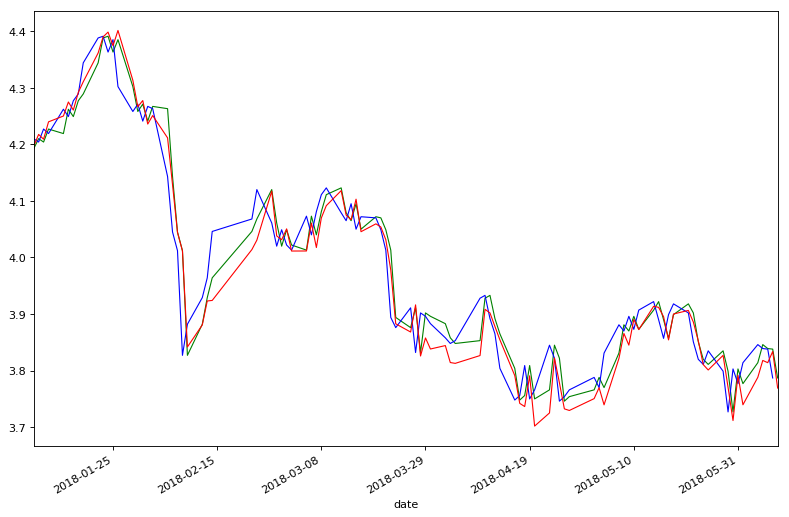

In [22]:
h = -100
plt.figure(figsize=(12,8), dpi=80)
skl_svr['close'][h:].plot(color='green', linewidth='1')
skl_svr['Next_Day_Close1'][h:].plot(color='blue', linewidth='1')
skl_svr['Predicted_Next_Close1'][h:].plot(color='red', linewidth='1')
plt.show()

In [23]:
# 计算实际数据与测数据的相关系数
# 设置收盘价序列：pd.Series()
corr_close = pd.Series(skl_svr['close'])
corr_NDC = pd.Series(skl_svr['Next_Day_Close1'])
corr_Pred_N_C = pd.Series(skl_svr['Predicted_Next_Close1'])

In [24]:
corr_close_PNC = corr_close.corr(corr_Pred_N_C)
corr_NDC_PNC = corr_NDC.corr(corr_Pred_N_C)
corr_close_NDC = corr_close.corr(corr_NDC)
print corr_close_PNC,
print corr_NDC_PNC,
print corr_close_NDC

0.997789136243 0.992274298627 0.994193284493


### 训练集和测试集不含有close的预测

In [25]:
Stock_Data_SVR_no_close = Stock_Data_SVR[[x for x in Stock_Data_SVR.columns if x <> 'close']]
Stock_Data_SVR = Stock_Data_SVR.dropna()
print len(Stock_Data_SVR_no_close), #1459
print len(Stock_Data_SVR_no_close.columns)

1459 19


In [26]:
# 设置训练集，取前1000多个数据作为训练集
g = -400
k_train = Stock_Data_SVR_no_close[:g]
j_train = Stock_Data_SVR['close'].shift(-1)[:g]
print len(k_train),
print len(j_train)

1059 1059


In [27]:
# 设置测试集，取400个数据作为测试集
k_test = Stock_Data_SVR_no_close[g:]
j_test = Stock_Data_SVR['close'].shift(-1)[g:]
print len(k_test),
print len(j_test)

400 400


In [28]:
# 拟合模型
model2 = clf.fit(k_train,j_train)
# 用测试集进行预测
preds2 = model2.predict(k_test)
# 评分函数
scores2 = model2.score(k_train,j_train)
scores2

0.99175265539522861

In [29]:
skl_svr_nc = pd.DataFrame(list(zip(j_test, preds2)), columns = ['Next_Day_Close2','Predicted_Next_Close2'], index = j_test.index)
skl_svr_nc = pd.concat([skl_svr,skl_svr_nc], axis=1)
skl_svr_nc.tail()

,close,Next_Day_Close1,Predicted_Next_Close1,Next_Day_Close2,Predicted_Next_Close2
date,,,,,
2018-06-04,3.814,3.846,3.788132,3.846,3.803692
2018-06-05,3.846,3.839,3.817983,3.839,3.834489
2018-06-06,3.839,3.838,3.814031,3.838,3.830513
2018-06-07,3.838,3.787,3.833771,3.787,3.835865
2018-06-08,3.787,NaN,3.769140,NaN,3.761327


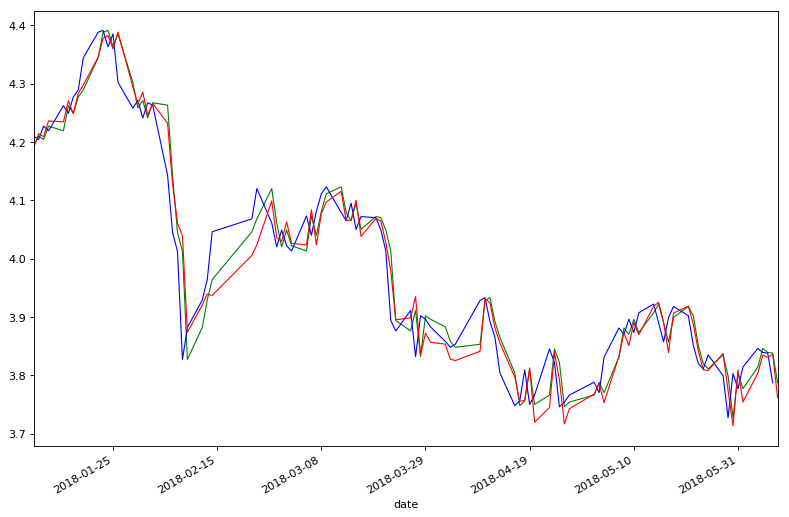

In [30]:
h = -100
plt.figure(figsize=(12,8), dpi=80)
skl_svr_nc['close'][h:].plot(color='green', linewidth='1')
skl_svr_nc['Next_Day_Close2'][h:].plot(color='blue', linewidth='1')
skl_svr_nc['Predicted_Next_Close2'][h:].plot(color='red', linewidth='1')
plt.show()

### 支持向量机（SVM）分类预测

In [31]:
stock_300ETF.tail()

,open,high,low,close,volume,amount,yesterday_close,range,amplitude
date,,,,,,,,,
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,3.777,0.979613,0.900185
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,3.814,0.839014,1.232302
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,3.846,-0.182007,0.468019
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,3.839,-0.026048,0.989841
2018-06-08,3.830,3.830,3.768,3.787,135333280,51353.004,3.838,-1.328817,1.615425


In [32]:
stock_300ETF['up_down'] = 0
stock_300ETF.loc[stock_300ETF['range'] > 0, 'up_down'] = 1.0
stock_300ETF.loc[stock_300ETF['range'] < 0, 'up_down'] = -1.0
stock_300ETF['Next_up_down'] = stock_300ETF['up_down'].shift(-1)
stock_300ETF['volume_std'] = (stock_300ETF['volume'] - stock_300ETF['amount'].mean())/stock_300ETF['amount'].std()
stock_300ETF['amount_std'] = (stock_300ETF['amount'] - stock_300ETF['amount'].mean())/stock_300ETF['amount'].std()

In [33]:
stock_300ETF.tail()

,open,high,low,close,volume,amount,yesterday_close,range,amplitude,up_down,Next_up_down,volume_std,amount_std
date,,,,,,,,,,,,,
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,3.777,0.979613,0.900185,1.0,1.0,716.065249,-0.450136
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,3.814,0.839014,1.232302,1.0,-1.0,595.574957,-0.494732
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,3.846,-0.182007,0.468019,-1.0,-1.0,474.007297,-0.540555
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,3.839,-0.026048,0.989841,-1.0,-1.0,623.593438,-0.482416
2018-06-08,3.830,3.830,3.768,3.787,135333280,51353.004,3.838,-1.328817,1.615425,-1.0,NaN,768.673808,-0.430892


In [34]:
Stock_Data_SVM = pd.concat([stock_300ETF[['close','amplitude','volume_std','amount_std','Next_up_down']], Risk_Ratio, ZFXF_YCWW], axis=1)
Stock_Data_SVM = Stock_Data_SVM.dropna()
Stock_Data_SVM_no_updown = Stock_Data_SVM[[x for x in Stock_Data_SVM.columns if x <> 'Next_up_down']]
print len(Stock_Data_SVM),
print len(Stock_Data_SVM.columns),
print len(Stock_Data_SVM_no_updown),
print len(Stock_Data_SVM_no_updown.columns)

1463 10 1463 9


In [35]:
# 设置训练集，取前1000多个数据作为训练集
g = -400
m_train = Stock_Data_SVM_no_updown[:g]
n_train = Stock_Data_SVM['Next_up_down'][:g]
print len(m_train),
print len(n_train)

1063 1063


In [36]:
# 设置测试集，取400个数据作为测试集
m_test = Stock_Data_SVM_no_updown[g:]
n_test = Stock_Data_SVM['Next_up_down'][g:]
print len(m_test),
print len(n_test)

400 400


In [37]:
clff = svm.SVC(kernel='linear')
clff

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# 拟合模型
model3 = clff.fit(m_train,n_train)

In [39]:
# 用测试集进行预测
preds3 = model3.predict(m_test)

In [40]:
# 评分函数
scores3 = model3.score(m_train,n_train)
scores3

0.48447789275634995

In [43]:
Stock_Data_SVM = pd.DataFrame(list(zip(n_test, preds3)), columns = ['Next_up_down','Predicted_Next_updown'], index = n_test.index)
# Stock_Data_SVM = pd.concat([,Stock_Data_SVM], axis=1)
Stock_Data_SVM.tail()

,Next_up_down,Predicted_Next_updown
date,,
2018-06-01,1.0,1.0
2018-06-04,1.0,1.0
2018-06-05,-1.0,1.0
2018-06-06,-1.0,1.0
2018-06-07,-1.0,1.0


### 结论：收盘价的预测意义不大，涨跌预测的方法失败了，要重新尝试。